<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Challenges Facing the New Competence Based Curriculum in Kenya

In [1]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
#!pip install geopandas matplotlib folium

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [2]:
!pip install mapclassify
import mapclassify #need for thematic map classification

kenya_counties.zip  sample_data


<Axes: >

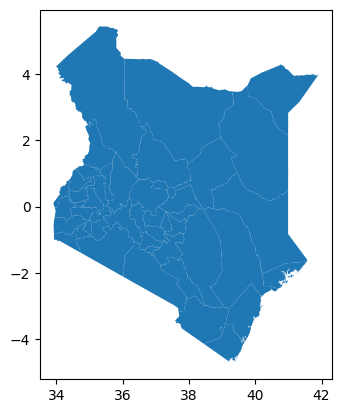

In [3]:
! wget -q -O kenya_counties.zip 'http://geoportal.rcmrd.org/geoserver/wfs?format_options=charset%3AUTF-8&typename=servir%3Akenya_county_boundary&outputFormat=SHAPE-ZIP&version=1.0.0&service=WFS&request=GetFeature' #aok: error: was nj_counties
!ls
zip_ref = zipfile.ZipFile('kenya_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kenya_counties=gpd.read_file('kenya_county_boundary.shp') #load the shapefile with gpd as kenya_counties
#Make the map
kenya_counties.plot()

In [4]:
#kenya_counties.dtypes

In [5]:
#kenya_counties.head(1)

In [7]:
import csv
sec_enrollment = pd.read_csv(r"/number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv")
sec_enrollment

,County,2007,2008,2009,2010,2011,2012,2013
0,BARINGO,17157,19419,21406,24034,25343,27803,30606
1,BOMET,26413,29895,32954,36999,38997,42812,46556
2,BUNGOMA,53867,60969,67208,75458,78835,87557,95673
3,BUSIA,21524,24362,26855,30152,31398,35308,38710
4,ELGEYO MARAKWET,14676,16610,18310,20558,21981,24000,26238
5,EMBU,22488,25453,28058,31502,34494,35752,39293
6,GARISSA,4694,5313,5856,6575,6641,7606,8262
7,HOMABAY,39085,44238,48765,54751,56972,63569,70177
8,ISIOLO,2002,2266,2498,2805,2814,3309,3707
9,KAJIADO,9470,10718,11815,13265,13929,15538,16879


In [8]:
sec_enrollment.dtypes


County    object
2007       int64
2008       int64
2009       int64
2010       int64
2011       int64
2012       int64
2013       int64
dtype: object

In [ ]:
#Focus on no.of sec-school enrolment in 2007 and 2013
sec_enrollment= sec_enrollment[['County','2007','2013']]
sec_enrollment= sec_enrollment.iloc[1:,:]
sec_enrollment

,County,2007,2013
1,BOMET,26413,46556
2,BUNGOMA,53867,95673
3,BUSIA,21524,38710
4,ELGEYO MARAKWET,14676,26238
5,EMBU,22488,39293
6,GARISSA,4694,8262
7,HOMABAY,39085,70177
8,ISIOLO,2002,3707
9,KAJIADO,9470,16879
10,KAKAMEGA,61489,109500


In [ ]:
#Calculate the enrollment change percentage between 2007 and 2013
sec_enrollment['ECHANGE'] = (sec_enrollment['2013'] - sec_enrollment['2007'])  / sec_enrollment['2013'] * 100
print(sec_enrollment)

             County   2007    2013    ECHANGE
1             BOMET  26413   46556  43.266174
2           BUNGOMA  53867   95673  43.696759
3             BUSIA  21524   38710  44.396797
4   ELGEYO MARAKWET  14676   26238  44.065859
5              EMBU  22488   39293  42.768432
6           GARISSA   4694    8262  43.185669
7           HOMABAY  39085   70177  44.305114
8            ISIOLO   2002    3707  45.994065
9           KAJIADO   9470   16879  43.894780
10         KAKAMEGA  61489  109500  43.845662
11          KERICHO  28393   50254  43.501015
12           KIAMBU  58410  103284  43.447194
13           KILIFI  22339   39957  44.092399
14        KIRINYAGA  22287   39412  43.451233
15            KISII  63499  106590  40.426869
16           KISUMU  36014   64886  44.496502
17            KITUI  37945   66788  43.185902
18            KWALE  14104   25990  45.732974
19         LAIKIPIA  14484   25777  43.810374
20             LAMU   2982    5273  43.447753
21         MACHAKOS  48280   85463

In [ ]:
sec_enrollment

,County,2007,2013,ECHANGE
1,Bomet,26413,46556,43.266174
2,Bungoma,53867,95673,43.696759
3,Busia,21524,38710,44.396797
4,Elgeyo marakwet,14676,26238,44.065859
5,Embu,22488,39293,42.768432
6,Garissa,4694,8262,43.185669
7,Homabay,39085,70177,44.305114
8,Isiolo,2002,3707,45.994065
9,Kajiado,9470,16879,43.894780
10,Kakamega,61489,109500,43.845662


In [ ]:
sec_enrollment['County'] = sec_enrollment['County'].str.capitalize()
sec_enrollment

,County,2007,2013,ECHANGE
1,Bomet,26413,46556,43.266174
2,Bungoma,53867,95673,43.696759
3,Busia,21524,38710,44.396797
4,Elgeyo marakwet,14676,26238,44.065859
5,Embu,22488,39293,42.768432
6,Garissa,4694,8262,43.185669
7,Homabay,39085,70177,44.305114
8,Isiolo,2002,3707,45.994065
9,Kajiado,9470,16879,43.894780
10,Kakamega,61489,109500,43.845662


In [ ]:
kenya_counties = pd.merge(
    left=kenya_counties,
    right=sec_enrollment,
    left_on='COUNTY',
    right_on='County',
    how='outer'
)


In [ ]:
print(kenya_counties.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    47 non-null     float64 
 1   AREA_       47 non-null     float64 
 2   PERIMETER   47 non-null     float64 
 3   COUNTY3_    47 non-null     float64 
 4   COUNTY3_ID  47 non-null     float64 
 5   COUNTY      47 non-null     object  
 6   Shape_Leng  47 non-null     float64 
 7   Shape_area  47 non-null     float64 
 8   Shape_len   47 non-null     float64 
 9   geometry    47 non-null     geometry
 10  County      46 non-null     object  
 11  2007        46 non-null     float64 
 12  2013        46 non-null     float64 
 13  ECHANGE     46 non-null     float64 
dtypes: float64(11), geometry(1), object(2)
memory usage: 6.4+ KB
None


In [ ]:
#kenya_counties.head(1)

# New Section

<Axes: title={'center': 'Population Change in Kenya Between 2009 and 2019'}>

<Axes: >

Text(0.5, 1.0, 'Enrollment in Kenyan Secondary Schools in 2013')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

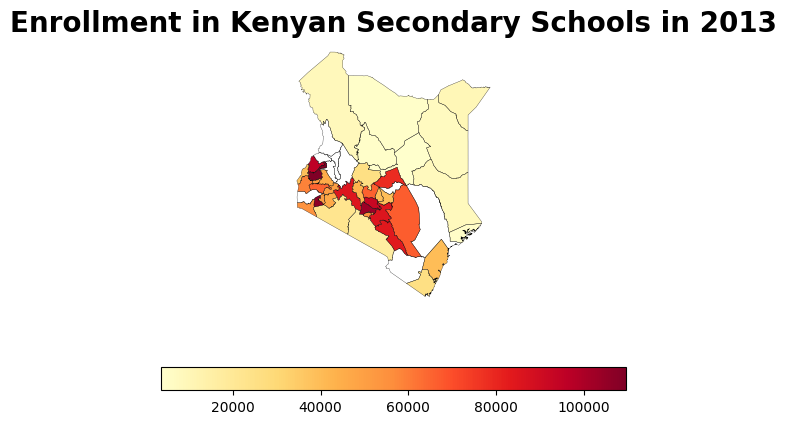

In [ ]:
#ax = kenya_counties.boundary.plot()
kenya_counties.plot(ax=ax, column='2013')
ax = kenya_counties.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(20, 5))
kenya_counties.plot(ax=ax, column='2013', legend=True, cmap='YlOrRd', legend_kwds={'shrink':0.3,
 'orientation': 'horizontal', 'format': '%.0f'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
ax.set_title('Enrollment in Kenyan Secondary Schools in 2013', size=20, weight='bold')
plt.show

In [ ]:
import csv
pop_census = pd.read_csv(r"/2019-population_census-report-per-county.csv")
pop_census


,County,Total_Population19,Male populatio 2019,Female population 2019,Households,Av_HH_Size,LandArea,Population Density,Population in 2009,Pop_change,Intersex population 2019
0,Baringo,"666,763","336,322","330,428","142,518",5,"10,976",61,"555,561","111,202",13
1,Bomet,"875,689","434,287","441,379","187,641",5,"2,531",346,"724,186","151,503",23
2,Bungoma,"1,670,570","812,146","858,389","358,796",5,"3,024",552,"1,630,934","39,636",35
3,Busia,"893,681","426,252","467,401","198,152",5,"1,696",527,"488,075","405,606",28
4,Elgeyo-Marakwet,"454,480","227,317","227,151","99,861",5,"3,032",150,"369,998","84,482",12
5,Embu,"608,599","304,208","304,367","182,743",3,"2,821",216,"516,212","92,387",24
6,Garissa,"841,353","458,975","382,344","141,394",6,"44,736",19,"623,060","218,293",34
7,Homa Bay,"1,131,950","539,560","592,367","262,036",4,"3,153",359,"963,794","168,156",23
8,Isiolo,"268,002","139,510","128,483","58,072",5,"25,350",11,"143,294","124,708",9
9,Kajiado,"1,117,840","557,098","560,704","316,179",4,"21,871",51,"687,312","430,528",38


In [ ]:
pop_census.dtypes

County                      object
Total_Population19          object
Male populatio 2019         object
Female population 2019      object
Households                  object
Av_HH_Size                   int64
LandArea                    object
Population Density          object
Population in 2009          object
Pop_change                  object
Intersex population 2019     int64
dtype: object

In [ ]:
pop_census.rename(columns={'Population in 2009': 'Total_Population09'}, inplace=True)

In [ ]:
#Focus on important population variables
pop_census= pop_census[['County','Total_Population19','LandArea','Total_Population09']]
pop_census= pop_census.iloc[1:,:]
pop_census

,County,Total_Population19,LandArea,Total_Population09
1,Bomet,"875,689","2,531","724,186"
2,Bungoma,"1,670,570","3,024","1,630,934"
3,Busia,"893,681","1,696","488,075"
4,Elgeyo-Marakwet,"454,480","3,032","369,998"
5,Embu,"608,599","2,821","516,212"
6,Garissa,"841,353","44,736","623,060"
7,Homa Bay,"1,131,950","3,153","963,794"
8,Isiolo,"268,002","25,350","143,294"
9,Kajiado,"1,117,840","21,871","687,312"
10,Kakamega,"1,867,579","3,020","1,660,651"


In [ ]:
pop_census['Total_Population19'] = pop_census['Total_Population19'].str.replace(',', '').astype('int')
pop_census['LandArea'] = pop_census['LandArea'].str.replace(',', '').astype('int')
pop_census['Total_Population09'] = pop_census['Total_Population09'].str.replace(',', '').astype('int')

In [ ]:
pop_census.dtypes

County                object
Total_Population19     int64
LandArea               int64
Total_Population09     int64
dtype: object

In [ ]:
pop_census['pop_change'] = (pop_census['Total_Population19'] - pop_census['Total_Population09'])  / pop_census['Total_Population19'] * 100

In [ ]:
pop_census

,County,Total_Population19,LandArea,Total_Population09,pop_change
1,Bomet,875689,2531,724186,17.301005
2,Bungoma,1670570,3024,1630934,2.372603
3,Busia,893681,1696,488075,45.385993
4,Elgeyo-Marakwet,454480,3032,369998,18.588717
5,Embu,608599,2821,516212,15.180275
6,Garissa,841353,44736,623060,25.945471
7,Homa Bay,1131950,3153,963794,14.855426
8,Isiolo,268002,25350,143294,46.532489
9,Kajiado,1117840,21871,687312,38.514278
10,Kakamega,1867579,3020,1660651,11.080013


In [ ]:
kenya_counties = pd.merge(
    left=kenya_counties,
    right=pop_census,
    left_on='COUNTY',
    right_on='County',
    how='outer'
)

In [ ]:
print(kenya_counties.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   OBJECTID            47 non-null     float64 
 1   AREA_               47 non-null     float64 
 2   PERIMETER           47 non-null     float64 
 3   COUNTY3_            47 non-null     float64 
 4   COUNTY3_ID          47 non-null     float64 
 5   COUNTY              47 non-null     object  
 6   Shape_Leng          47 non-null     float64 
 7   Shape_area          47 non-null     float64 
 8   Shape_len           47 non-null     float64 
 9   geometry            47 non-null     geometry
 10  County_x            46 non-null     object  
 11  2007                46 non-null     float64 
 12  2013                46 non-null     float64 
 13  ECHANGE             46 non-null     float64 
 14  County_y            46 non-null     object  
 15  Total_Population19  46 non-null   

<Axes: title={'center': 'Enrollment in Kenyan Secondary Schools in 2013'}>

<Axes: >

Text(0.5, 1.0, 'Population Change in Kenya Between 2009 and 2019')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

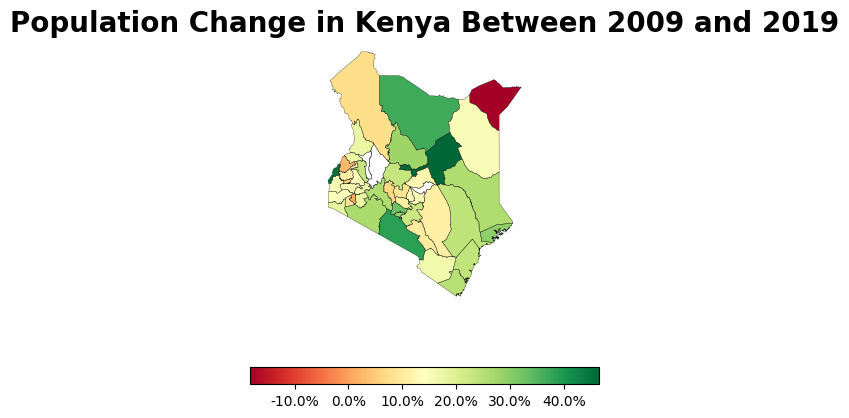

In [ ]:

kenya_counties.plot(ax=ax, column='pop_change')
ax = kenya_counties.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(15, 5))
kenya_counties.plot(ax=ax, column='pop_change', legend=True, cmap='RdYlGn', legend_kwds={'shrink':0.3,
 'orientation': 'horizontal', 'format': '%.1f%%'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
ax.set_title('Population Change in Kenya Between 2009 and 2019', size=20, weight='bold')
plt.show